In [1]:
#packages
import pandas as pd
import mplfinance
from matplotlib.dates import date2num
from datetime import datetime
import numpy as np

from scipy import stats
import scipy.optimize
from scipy.optimize import OptimizeWarning
import warnings
import math

import os
import nbimporter
from feature_functions import *

import sklearn

Importing Jupyter notebook from feature_functions.ipynb


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import sqrt

In [3]:
df=pd.read_csv('EURUSD.csv')
df.columns=['date','open','high','low','close','volume']
df.date = pd.to_datetime(df.date,format='%d.%m.%Y %H:%M:%S.%f')
df=df.set_index(df.date)
df=df[['open','high','low','close','volume']]

In [4]:
df = heikenashi(df,[1])
df.columns=['open','high','low','close']

In [5]:
res = momentum(df,[10]).close[10]
df=df.loc[df.index[10]:]
df['momentum'] = res

In [6]:
#return and label columns
df['aclose'] = df['close']
df['return'] = df['aclose'] - df['aclose'].shift(1)
# return_range = df['return'].max() - df['return'].min()
# df['return'] = df['return'] / return_range

df['label'] = df['return'].shift(-1)
df['label'] = df['label'].apply(lambda x: 1 if x>0.0 else 0)
df.dropna(inplace=True)



In [7]:
import time


In [8]:
# Make training dataset
start = time.time()

n_features = 200

train_x = np.array([]).reshape([-1,n_features])
train_y = np.array([]).reshape([-1,1])
for index, row in df.iterrows():
    
    i = df.index.get_loc(index)
    if i<n_features:
        continue
                
    _x = np.array(df[i-n_features+1:i+1]['return']).T.reshape([1, -1])
    #_x= np.append(_x,np.float(df['momentum'][i])) 
    _y = np.int(df['label'][i])
    train_x = np.vstack((train_x, _x))
    train_y = np.vstack((train_y, _y))
train_y = train_y.reshape([-1])
end = time.time()
print(end - start)


14.239798307418823


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [10]:
train_len = int(len(train_x)*0.95)
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
variables = train_x.shape[1]

x_train=train_x[0:train_len]
y_train=train_y[0:train_len]
x_test = train_x[train_len:]
y_test= train_y[train_len:]

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)
model.compile(optimizer=opt, loss='binary_crossentropy')


In [12]:
history = model.fit(x_train, y_train, epochs=500, batch_size=train_len)


Train on 5750 samples
Epoch 1/500
5750/5750 [==============================] - 2s 284us/sample - loss: 2.0561
Epoch 2/500
5750/5750 [==============================] - 0s 3us/sample - loss: 2.0320
Epoch 3/500
5750/5750 [==============================] - 0s 3us/sample - loss: 2.0124
Epoch 4/500
5750/5750 [==============================] - 0s 4us/sample - loss: 1.9961
Epoch 5/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.9820
Epoch 6/500
5750/5750 [==============================] - 0s 4us/sample - loss: 1.9691
Epoch 7/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.9568
Epoch 8/500
5750/5750 [==============================] - 0s 4us/sample - loss: 1.9448
Epoch 9/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.9330
Epoch 10/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.9214
Epoch 11/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.9100
Epoch 12/500
5750/5750 [====

Epoch 95/500
5750/5750 [==============================] - 0s 4us/sample - loss: 1.1430
Epoch 96/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.1328
Epoch 97/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.1225
Epoch 98/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.1123
Epoch 99/500
5750/5750 [==============================] - 0s 4us/sample - loss: 1.1020
Epoch 100/500
5750/5750 [==============================] - 0s 4us/sample - loss: 1.0918
Epoch 101/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.0815
Epoch 102/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.0713
Epoch 103/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.0610
Epoch 104/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.0509
Epoch 105/500
5750/5750 [==============================] - 0s 3us/sample - loss: 1.0410
Epoch 106/500
5750/5750 [============

5750/5750 [==============================] - 0s 4us/sample - loss: 0.5858
Epoch 189/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.5829
Epoch 190/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5800
Epoch 191/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.5772
Epoch 192/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.5744
Epoch 193/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5716
Epoch 194/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5688
Epoch 195/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5661
Epoch 196/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5633
Epoch 197/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5606
Epoch 198/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.5579
Epoch 199/500
5750/5750 [=====================

Epoch 282/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.4001
Epoch 283/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3987
Epoch 284/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3973
Epoch 285/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3959
Epoch 286/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3945
Epoch 287/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3932
Epoch 288/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3919
Epoch 289/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3905
Epoch 290/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3892
Epoch 291/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3879
Epoch 292/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.3865
Epoch 293/500
5750/5750 [=======

5750/5750 [==============================] - 0s 3us/sample - loss: 0.2977
Epoch 376/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2968
Epoch 377/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2960
Epoch 378/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2951
Epoch 379/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2942
Epoch 380/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2934
Epoch 381/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2925
Epoch 382/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2917
Epoch 383/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2908
Epoch 384/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2900
Epoch 385/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2891
Epoch 386/500
5750/5750 [=====================

Epoch 469/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2299
Epoch 470/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2293
Epoch 471/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2287
Epoch 472/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2281
Epoch 473/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2275
Epoch 474/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2270
Epoch 475/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2264
Epoch 476/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2258
Epoch 477/500
5750/5750 [==============================] - 0s 4us/sample - loss: 0.2252
Epoch 478/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2247
Epoch 479/500
5750/5750 [==============================] - 0s 3us/sample - loss: 0.2241
Epoch 480/500
5750/5750 [=======

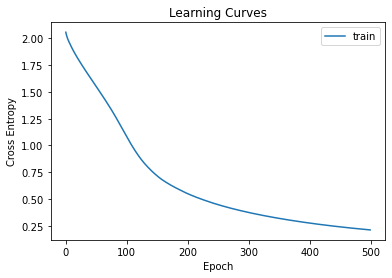

In [13]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [14]:
erreur = model.evaluate(x_test, y_test, verbose=2)
print('MSE: %.3f, RMSE: %.3f' % (erreur, sqrt(erreur)))

303/303 - 0s - loss: 1.6443
MSE: 1.644, RMSE: 1.282


In [15]:
pred= np.round(model.predict(x_test))[0:len(x_test)]

In [20]:
 def calc_profit(row):
    if row['won']:
        return (abs(row['return'])*contracts - commission)
    else:
        return (-abs(row['return'])*contracts - commission)


In [21]:
# Calculate equity..

contracts  = 2000.0
commission = 0.0


df_trade = pd.DataFrame(train_x[train_len:,-1], columns=['return'])
df_trade['label']  = train_y[train_len:]
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']
df_trade['return'] = df_trade['return'].shift(-1) * return_range
df_trade.drop(df_trade.index[len(df_trade)-1], inplace=True)

df_trade['pnl'] = df_trade.apply(lambda row: calc_profit(row), axis=1)
df_trade['equity'] = df_trade['pnl'].cumsum()

display(df_trade.tail())
df_trade.plot(y='equity', figsize=(10,4), title='Backtest with $10000 initial capital')
plt.xlabel('Trades')
plt.ylabel('Equity (USD)')
for r in df_trade.iterrows():
    if r[1]['won']:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='g')
    else:
        plt.axvline(x=r[0], linewidth=0.5, alpha=0.8, color='r')

NameError: name 'return_range' is not defined

In [ ]:

# Calculate summary of trades

n_win_trades = float(df_trade[df_trade['pnl']>0.0]['pnl'].count())
n_los_trades = float(df_trade[df_trade['pnl']<0.0]['pnl'].count())
print("Net Profit            : $%.2f" % df_trade.tail(1)['equity'])
print("Number Winning Trades : %d" % n_win_trades)
print("Number Losing Trades  : %d" % n_los_trades)
print("Percent Profitable    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
print("Avg Win Trade         : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].mean())
print("Avg Los Trade         : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].mean())
print("Largest Win Trade     : $%.3f" % df_trade[df_trade['pnl']>0.0]['pnl'].max())
print("Largest Los Trade     : $%.3f" % df_trade[df_trade['pnl']<0.0]['pnl'].min())
print("Profit Factor         : %.2f" % abs(df_trade[df_trade['pnl']>0.0]['pnl'].sum()/df_trade[df_trade['pnl']<0.0]['pnl'].sum()))

df_trade['pnl'].hist(bins=20)

In [ ]:
from tensorflow.keras.utils import plot_model
model.summary()
plot_model(model, 'model.png', show_shapes=True)